Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type


* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [56]:
#Raw data of city csv
filepath = os.path.join("raw_data/city_data.csv")
city_raw_df=pd.read_csv(filepath, low_memory="false")
city_raw_df.sort_values("city").head()
# Duplicate city Port James but different driver count index 84:1,100:1


,city,driver_count,type
65,Alvarezhaven,21,Urban
18,Alyssaberg,67,Urban
94,Anitamouth,16,Suburban
53,Antoniomouth,21,Urban
43,Aprilchester,49,Urban


In [6]:
#raw data of ride csv
filepath2 = os.path.join("raw_data/ride_data.csv")
ride_raw_df=pd.read_csv(filepath2, low_memory="false")
ride_raw_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [37]:
#merged to raw data tables
merged = pd.merge(city_raw_df,ride_raw_df, on ="city")
merged.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [43]:
#add oolumn for color reference for type of city
color_df = pd.DataFrame({"type":["Urban","Suburban","Rural"],
                        "color ref":["gold","lightskyblue","lightcoral"]})
#merge color_df with merged
merged_with_colorref= pd.merge(merged, color_df, on="type")
merged_with_colorref.head()

,city,driver_count,type,date,fare,ride_id,color ref
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795,gold
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333,gold
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736,gold
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309,gold
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829,gold


In [59]:
#group by city, drive_count, type, and aggregate date, fare
grouped =merged_with_colorref.groupby(["city","driver_count","type","color ref"]).agg({"date":"count", "fare":"mean"}).reset_index()
grouped = grouped.rename(columns = {"date":"No. of rides", "fare":"Avg Fare"})
grouped.head()

,city,driver_count,type,color ref,No. of rides,Avg Fare
0,Alvarezhaven,21,Urban,gold,31,23.928710
1,Alyssaberg,67,Urban,gold,26,20.609615
2,Anitamouth,16,Suburban,lightskyblue,9,37.315556
3,Antoniomouth,21,Urban,gold,22,23.625000
4,Aprilchester,49,Urban,gold,19,21.981579


In [125]:
plt.scatter(grouped["No. of rides"], grouped["Avg Fare"], s=grouped["driver_count"], c = grouped["color ref"])
#plt.show()

In [126]:
#tick marks x axis
x_axis = np.arange(0,grouped["No. of rides"].max() + 10,5)
x_axis


array([ 0,  5, 10, 15, 20, 25, 30, 35, 40])

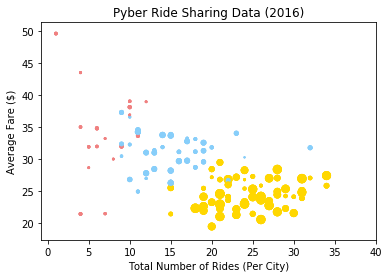

In [127]:
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.xticks(x_axis)

plt.legend((grouped["type"]),
           (grouped["color ref"])
            loc=best)           

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Print our chart to the screen
plt.show()